# Download THUIAR TSV datasets - Banking77, Stackoverflow, CLINC150OOS

In [ ]:
!git clone https://github.com/thuiar/Adaptive-Decision-Boundary.git

Cloning into 'Adaptive-Decision-Boundary'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 211 (delta 36), reused 36 (delta 36), pack-reused 173 (from 1)
Receiving objects: 100% (211/211), 1.26 MiB | 497.00 KiB/s, done.
Resolving deltas: 100% (116/116), done.


In [ ]:
# /content/Adaptive-Decision-Boundary/data/banking
# /content/Adaptive-Decision-Boundary/data/stackoverflow
# /content/Adaptive-Decision-Boundary/data/oos


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [ ]:
# read the train, dev, test dataset (in tsv format) from banking, stackoverflow, oos folders
# each file has column headers to account for
# when reading into 1 main df, note down which dataset (eg banking/stackoverflow/oos) and the split (train/dev/test)

def load_data(data_dir):
    """Loads train, dev, and test datasets from a specified directory and combines them."""

    combined_df = pd.DataFrame()
    for split in ['train', 'dev', 'test']:
        file_path = os.path.join(data_dir, f'{split}.tsv')
        if os.path.exists(file_path):
          try:
            df = pd.read_csv(file_path, sep='\t')
            df['dataset'] = os.path.basename(data_dir)
            df['split'] = split
            combined_df = pd.concat([combined_df, df], ignore_index=True)
          except pd.errors.ParserError as e:
            print(f"Error parsing {file_path}: {e}")
            # Handle the error appropriately, e.g., skip the file, log the error, etc.
        else:
            print(f"Warning: {split}.tsv not found in {data_dir}")
    return combined_df


# Specify the base directory where the datasets are located
base_dir = "/content/Adaptive-Decision-Boundary/data"

# Load datasets from all subfolders (banking, stackoverflow, oos) and store them in separate dataframes
datasets = ['banking', 'stackoverflow', 'oos']
dataset_dfs = {}

for dataset_name in datasets:
    data_dir = os.path.join(base_dir, dataset_name)
    if os.path.exists(data_dir):
      dataset_dfs[dataset_name] = load_data(data_dir)
    else:
      print(f"Warning: Directory {data_dir} not found.")

# Now 'dataset_dfs' is a dictionary where keys are dataset names and values are dataframes
# containing combined train, dev, and test data for each dataset.
# For example, dataset_dfs['banking'] contains the combined data for the banking dataset.
print("Combined dataframes created for each dataset:")
for dataset_name, df in dataset_dfs.items():
    print(f"\n{dataset_name}:")
    print(df.head())
    print(df.info())

Combined dataframes created for each dataset:

banking:
                                                text  \
0     Could you help my figure out the exchange fee?   
1  I made a cash deposit to my account but i don'...   
2  Hello - I'm on the app and trying to purchase ...   
3         Why is it saying I have a pending payment?   
4  Is there an extra charge to exchange different...   

                                              label  dataset  split  
0                                   exchange_charge  banking  train  
1  balance_not_updated_after_cheque_or_cash_deposit  banking  train  
2                           beneficiary_not_allowed  banking  train  
3                              pending_card_payment  banking  train  
4                                   exchange_charge  banking  train  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13083 entries, 0 to 13082
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   

In [ ]:
df_banking = all_data[all_data['dataset'] == 'banking']
df_stackoverflow = all_data[all_data['dataset'] == 'stackoverflow']
df_oos = all_data[all_data['dataset'] == 'oos']


In [ ]:
len(df_banking), len(df_stackoverflow), len(df_oos)

(13083, 20000, 23700)

In [ ]:
df_oos.to_csv('oos.csv', index=False)

## Sanity check count of unique classes/labels per dataset split

In [ ]:
# unique 'label' count for banking, stackoverflow, oos
# in their train/dev/test 'split'

# Group by dataset, split, and label, then count the unique labels
label_counts = all_data.groupby(['dataset', 'split'])['label'].nunique()
label_counts

dataset        split
banking        dev       77
               test      77
               train     77
oos            dev      150
               test     151
               train    150
stackoverflow  dev       20
               test      20
               train     20
Name: label, dtype: int64

## Dataset split

In [ ]:
# count of train/dev/test for each df_*
print("Banking:")
print(df_banking.groupby('split').size())
print("\nStackoverflow:")
print(df_stackoverflow.groupby('split').size())
print("\nOOS:")
print(df_oos.groupby('split').size())


Banking:
split
dev      1000
test     3080
train    9003
dtype: int64

Stackoverflow:
split
dev       2000
test      6000
train    12000
dtype: int64

OOS:
split
dev       3000
test      5700
train    15000
dtype: int64


## Visualise distribution

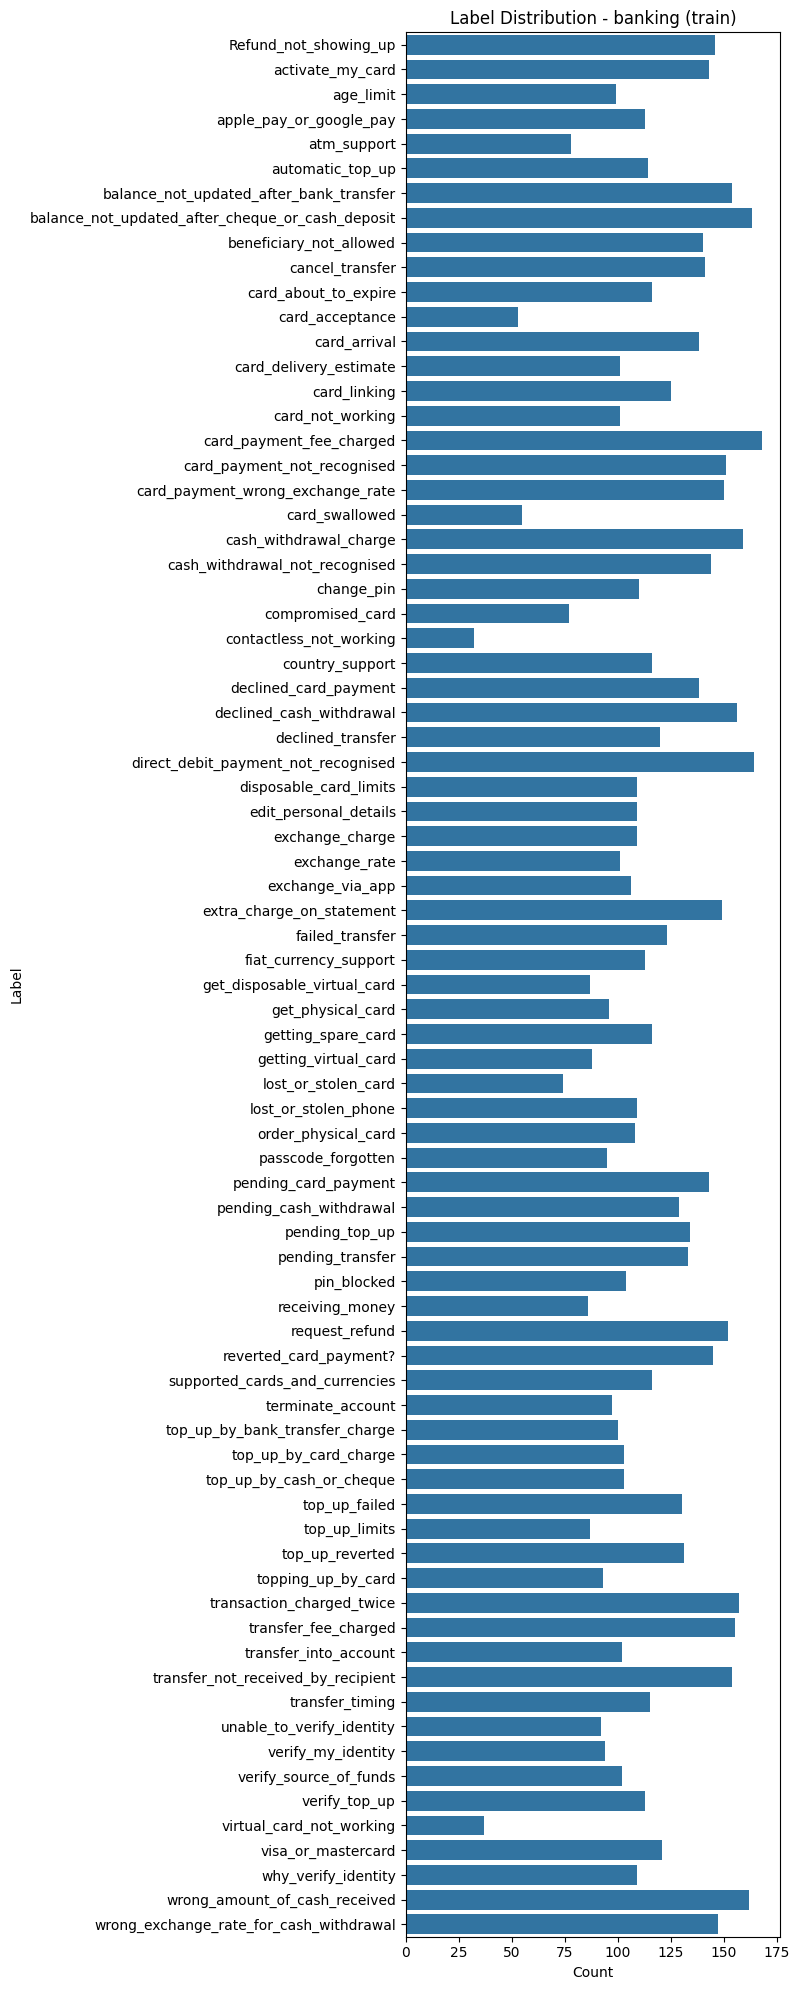

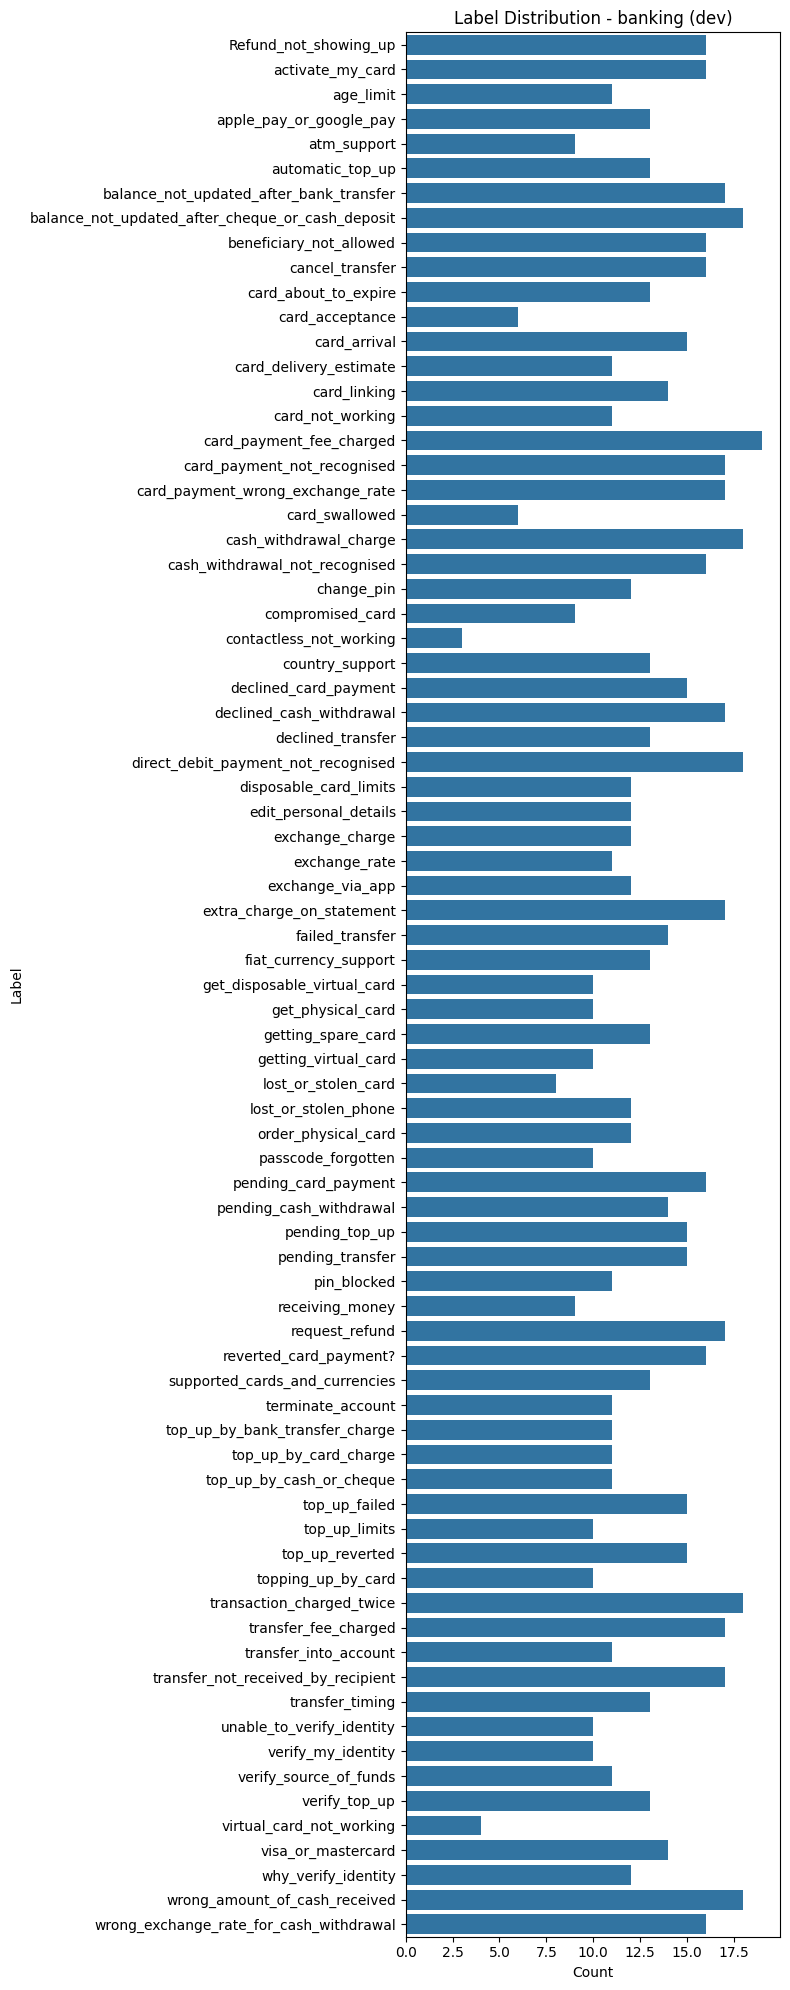

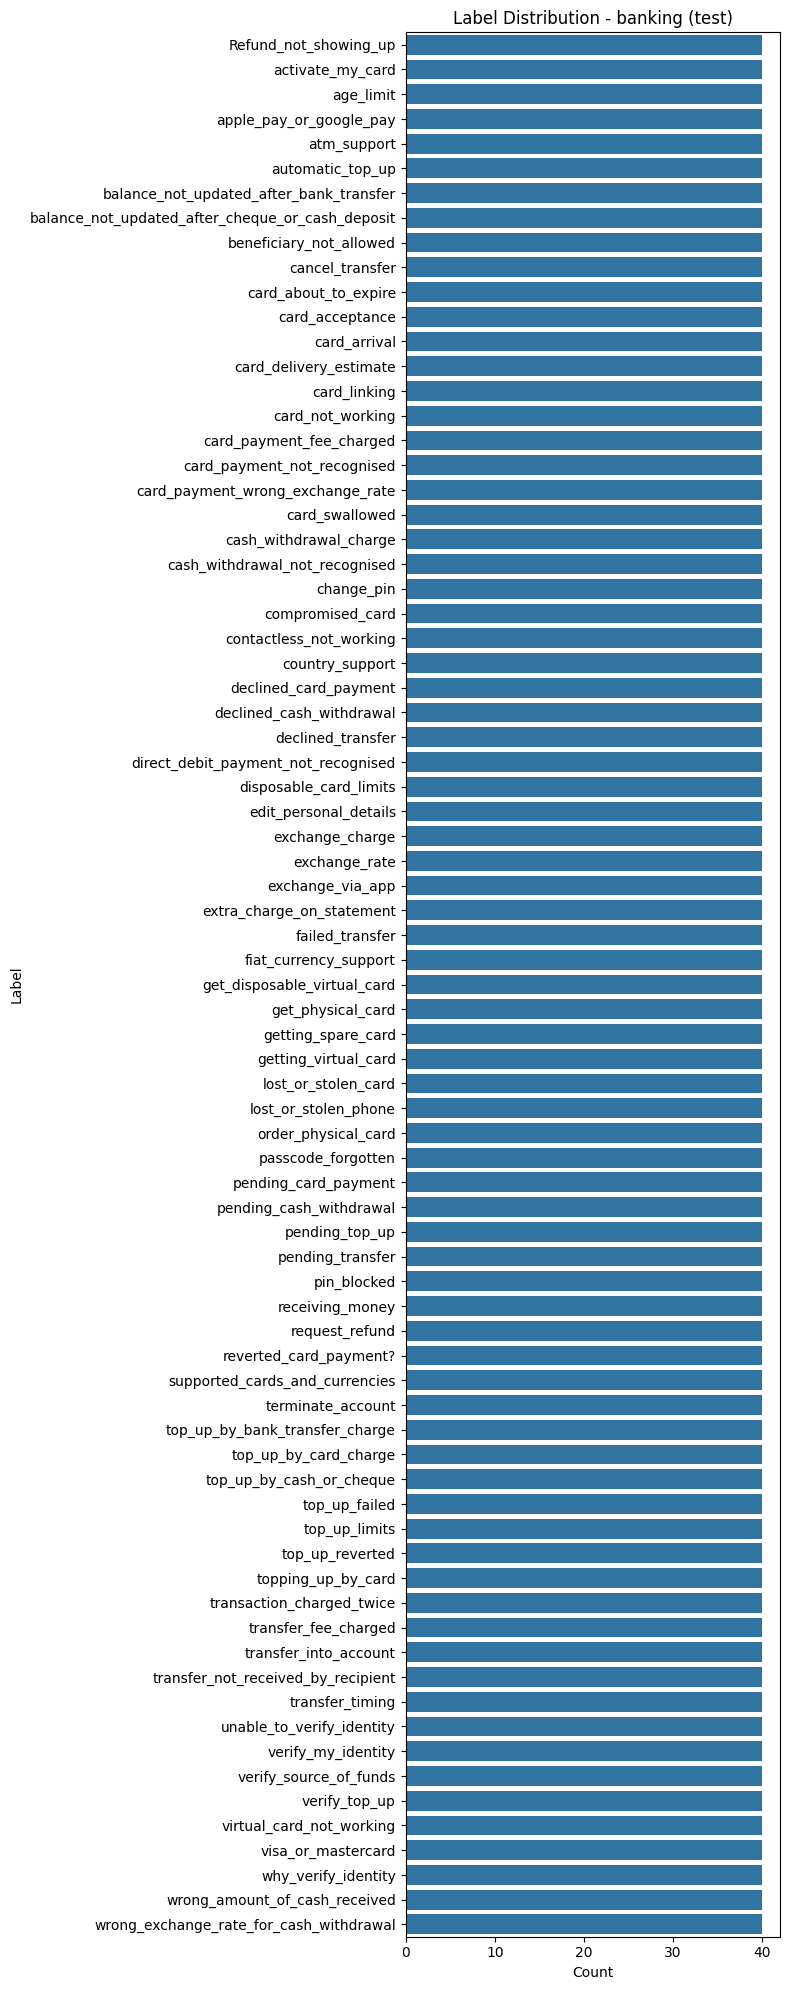

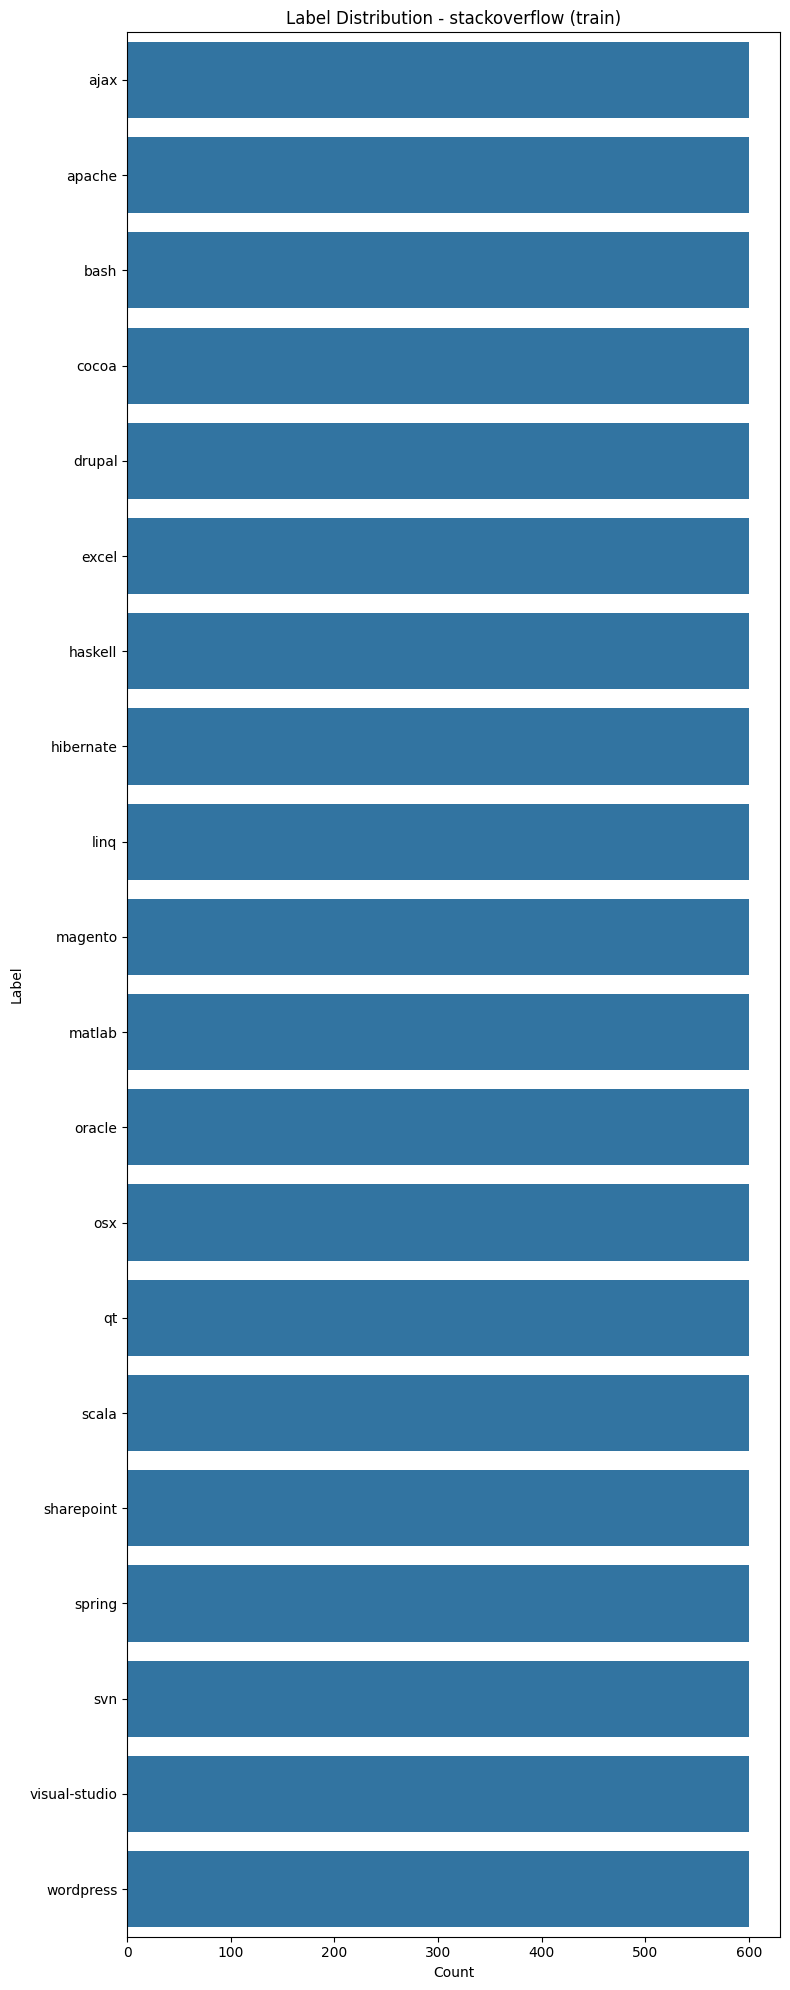

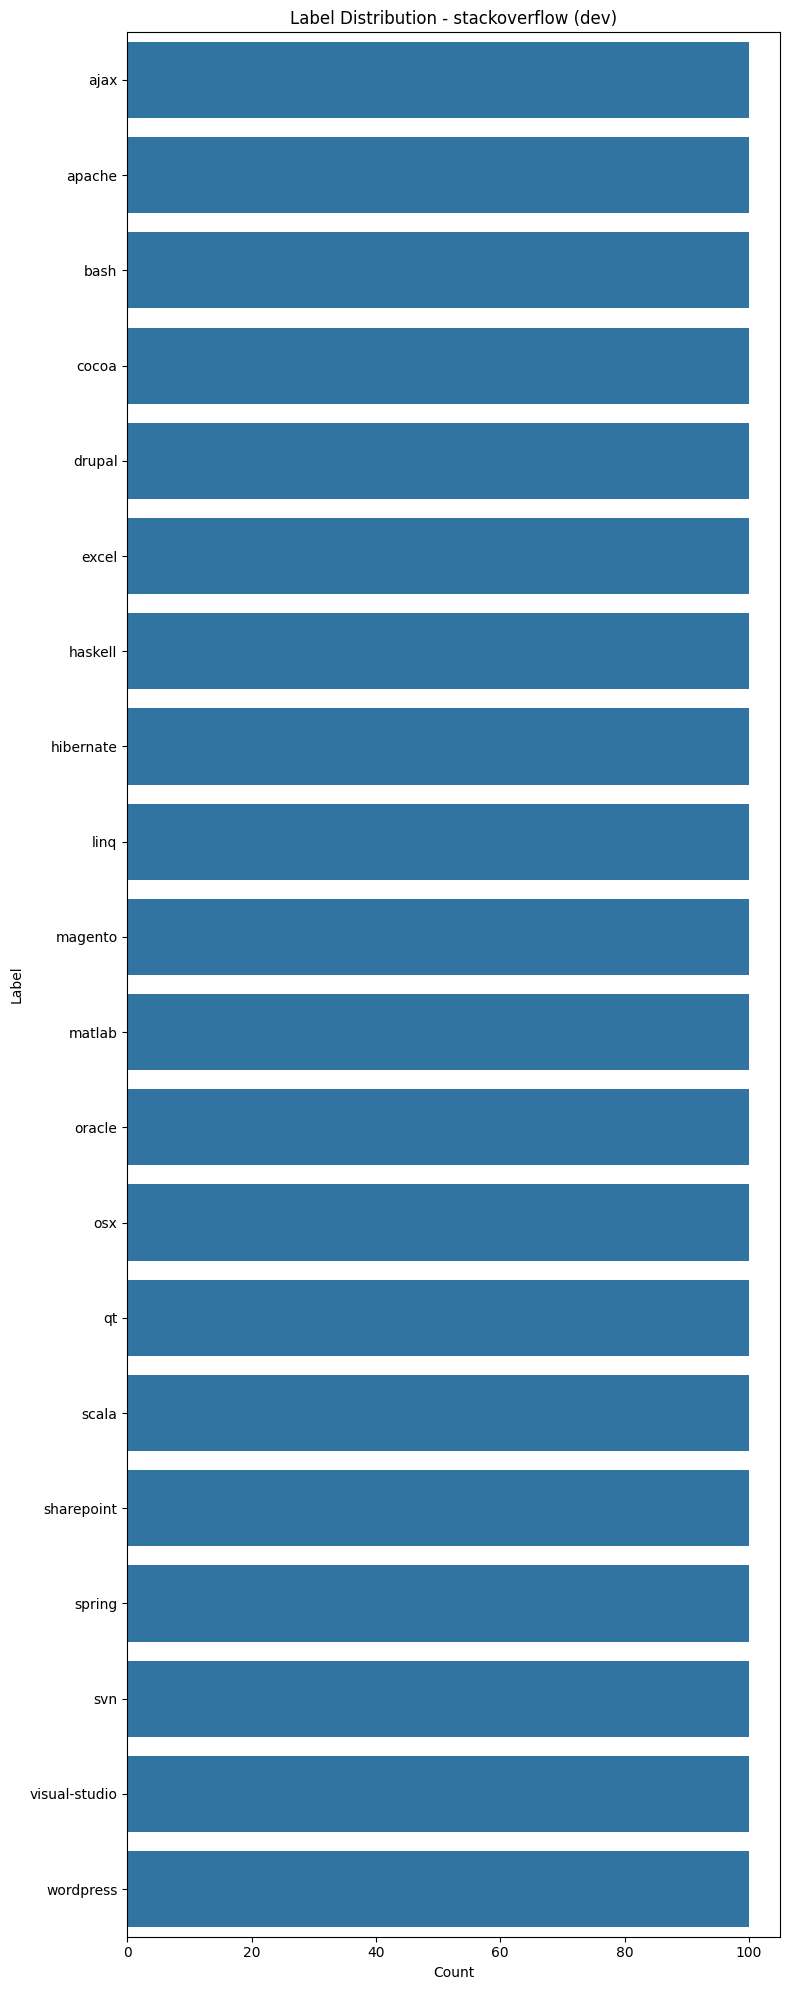

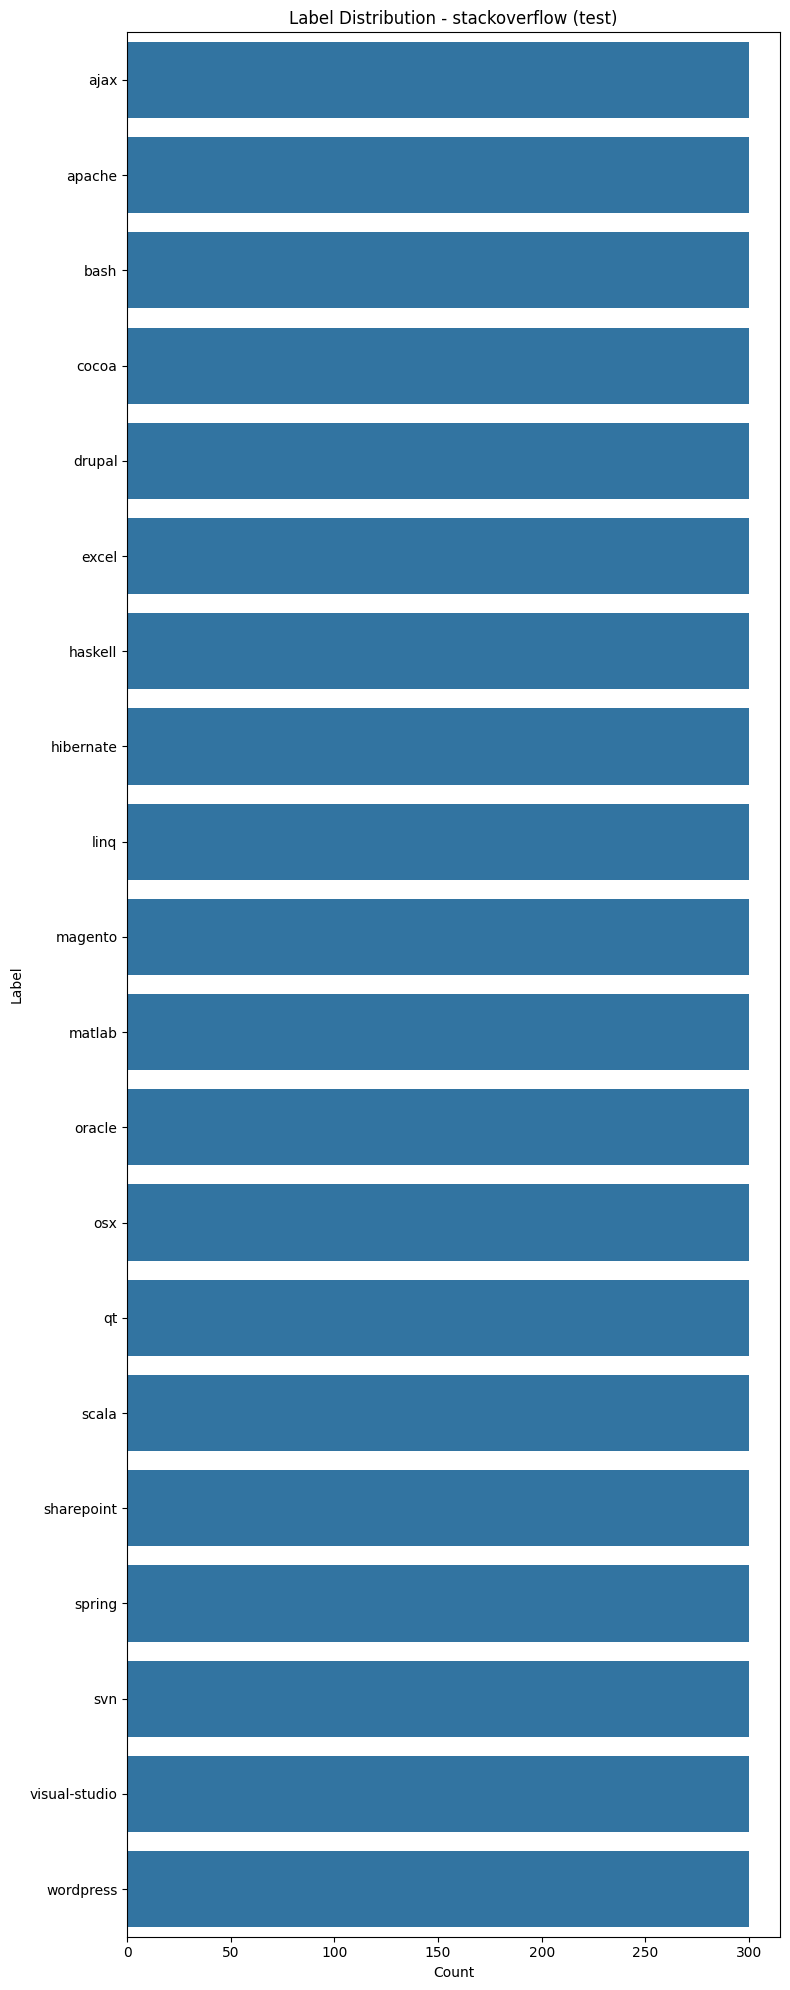

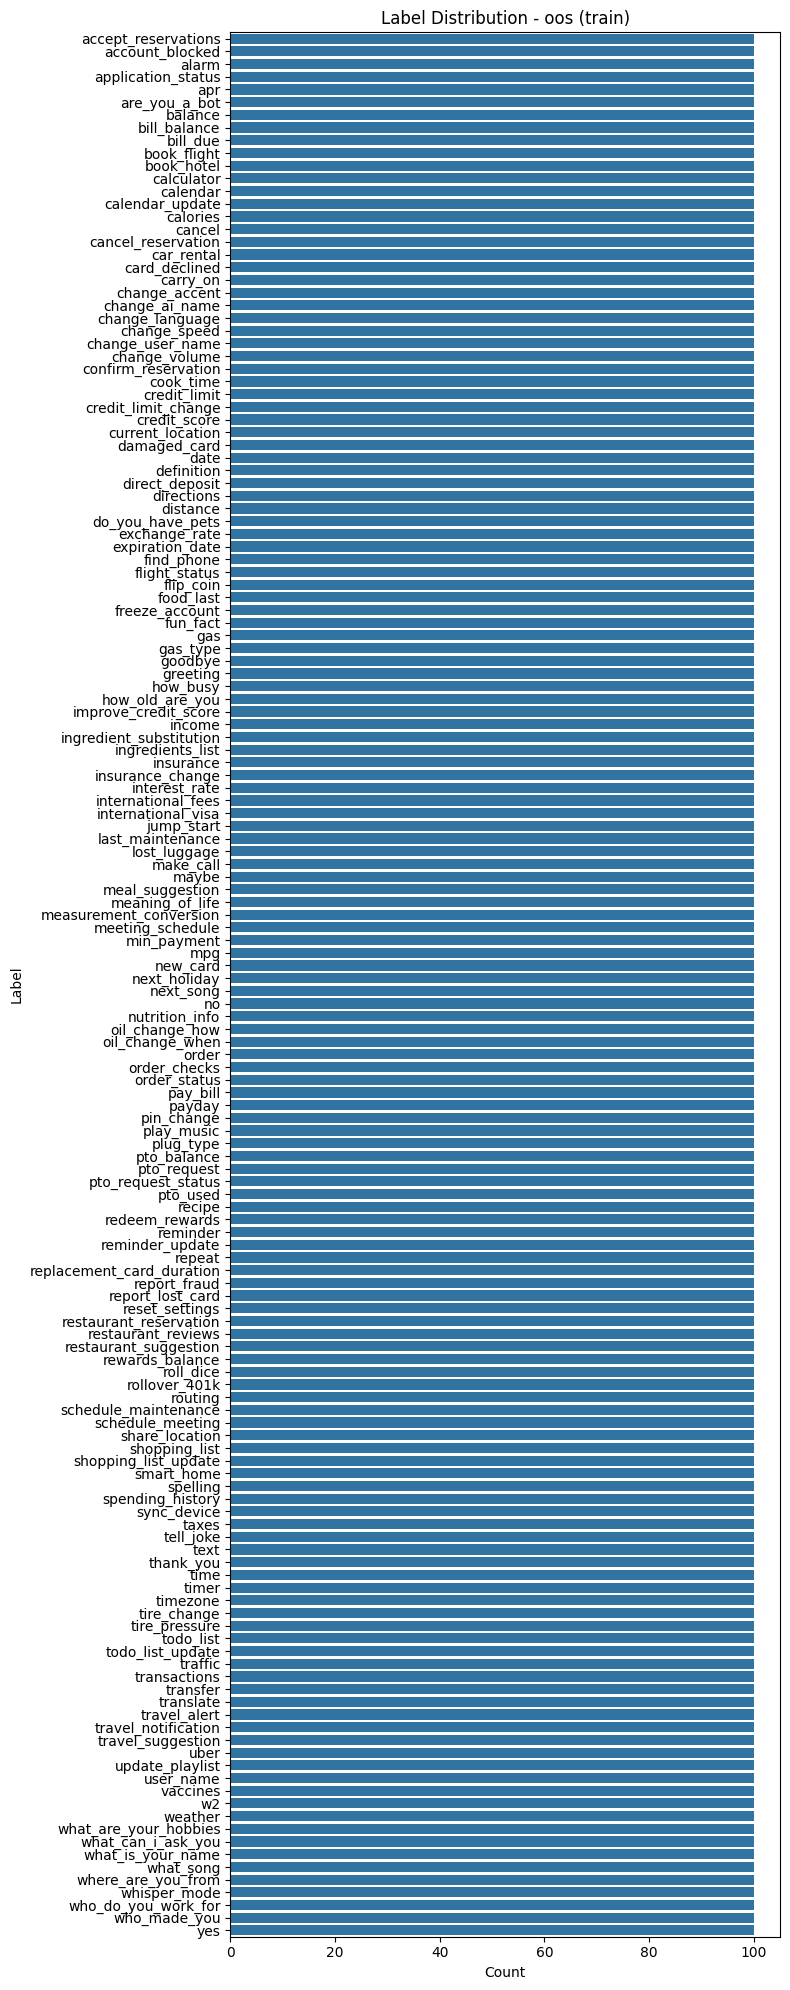

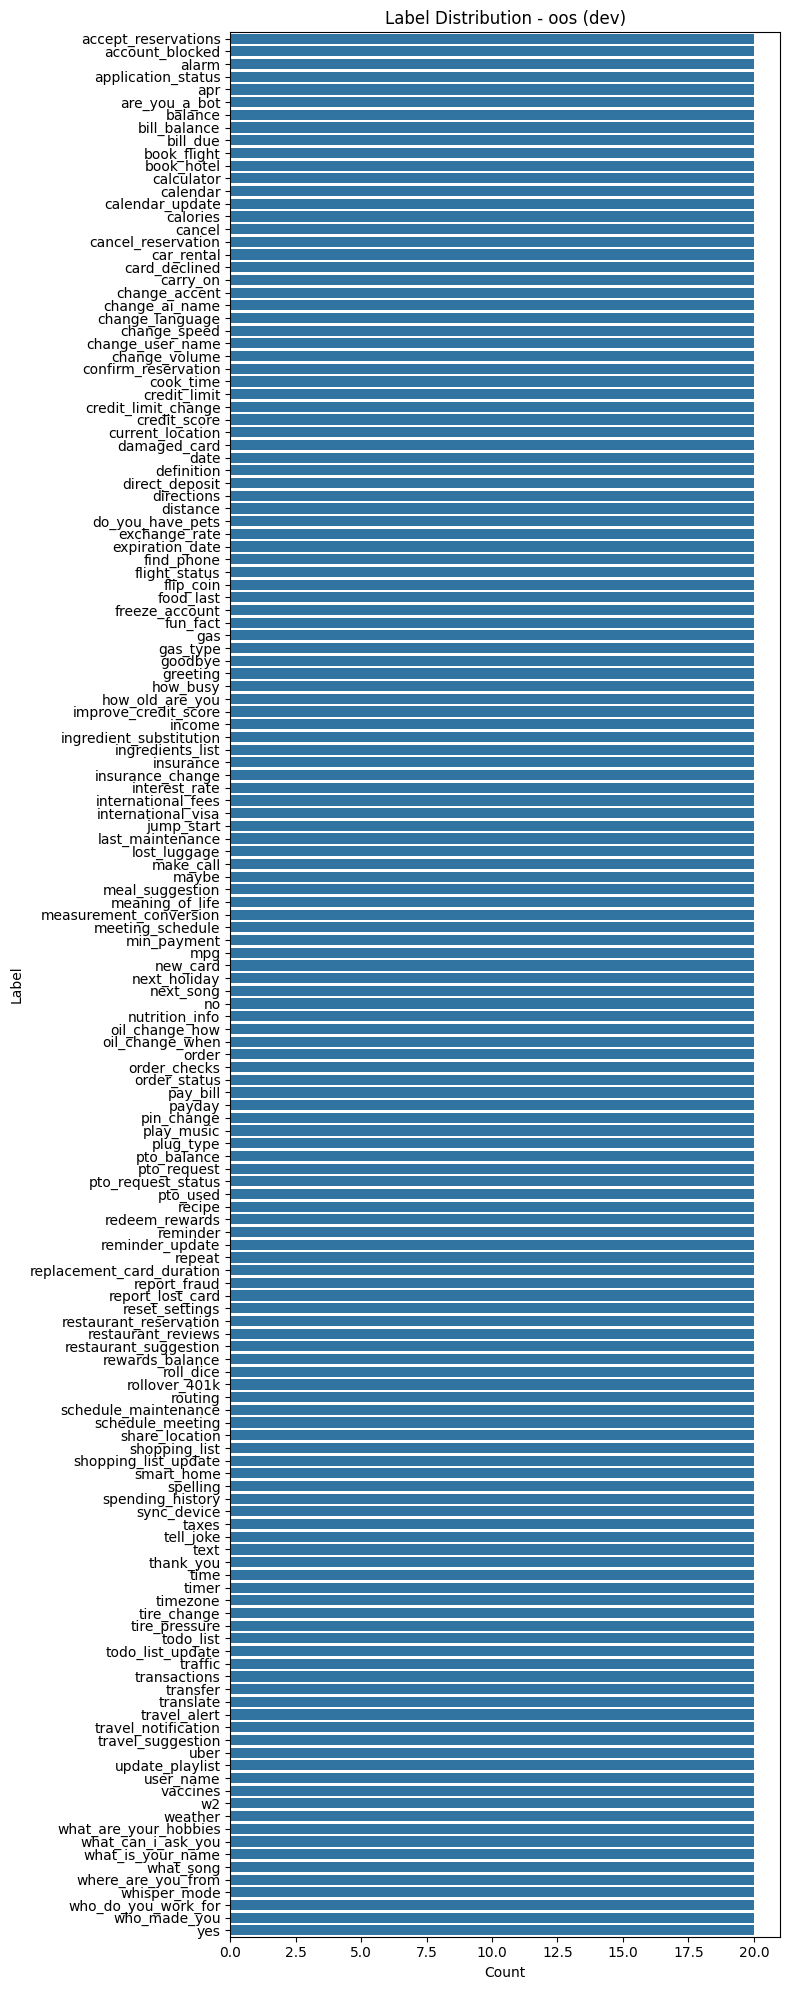

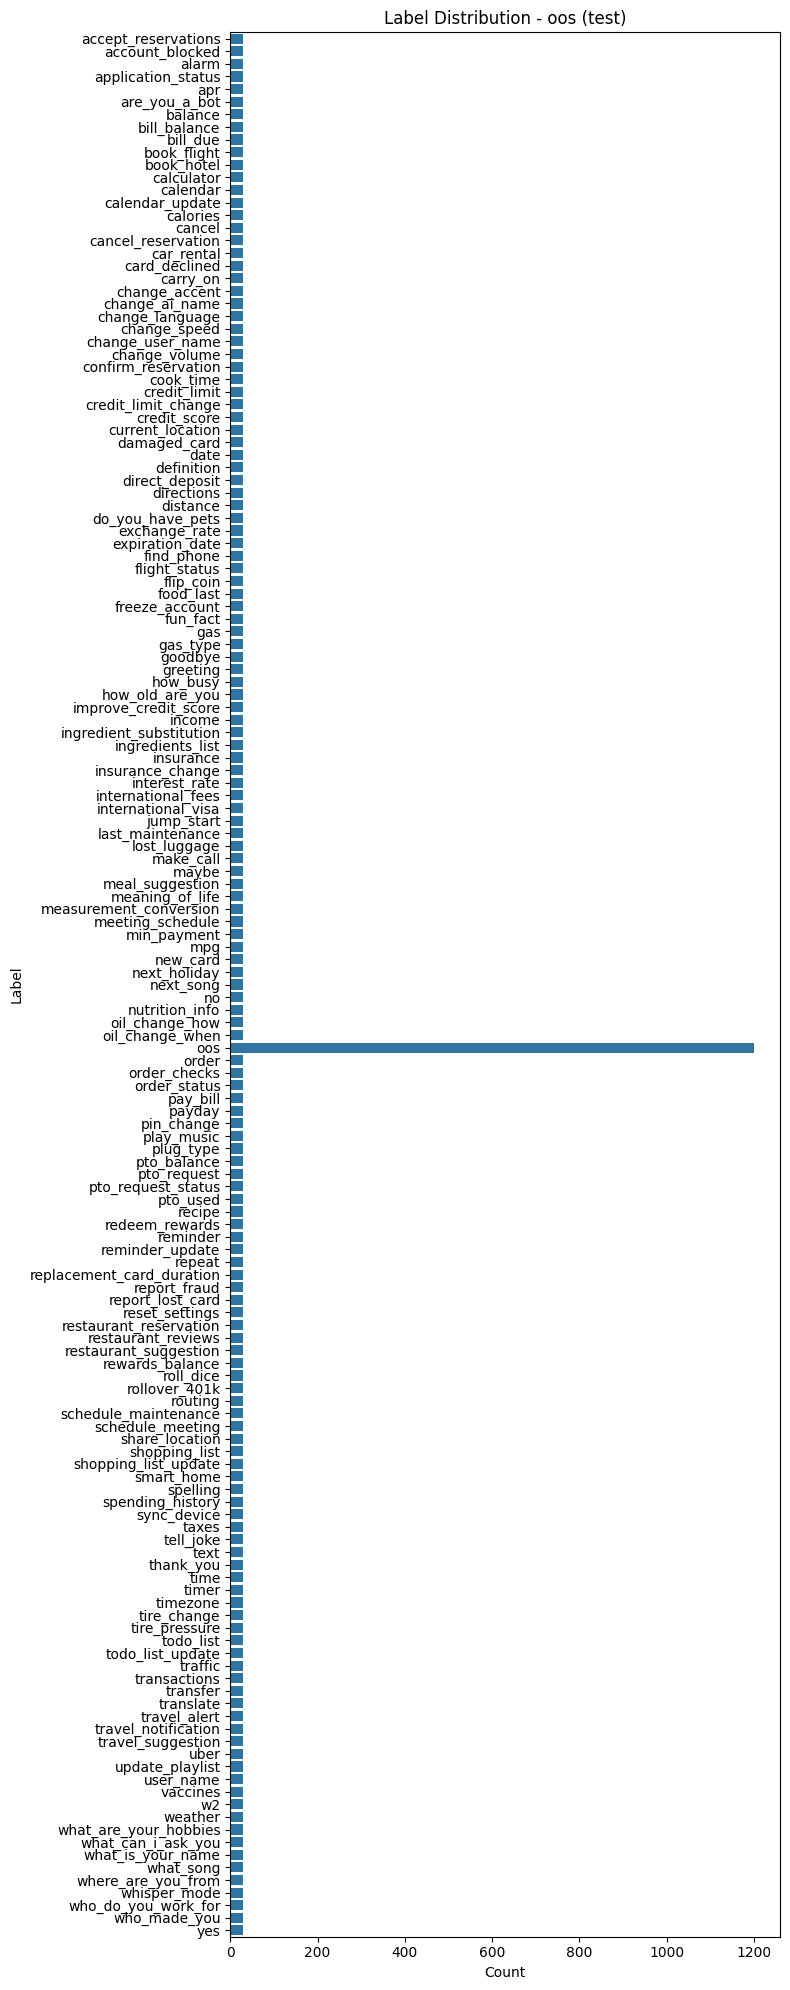

In [ ]:
# for each df_banking/stackoverflow/oos
# within each df, for train vs dev vs test, plot the distribution of 'label'
# sort the bars by 'label' in ascending order

import matplotlib.pyplot as plt
dfs = {'banking': df_banking, 'stackoverflow': df_stackoverflow, 'oos': df_oos}
for dataset_name, df in dfs.items():
    for split in ['train', 'dev', 'test']:
        split_df = df[df['split'] == split]
        if not split_df.empty:
          plt.figure(figsize=(8, 20))  # Adjust figure size for better label visibility

          sns.countplot(y='label', data=split_df, order=sorted(split_df['label'].unique()))
          plt.title(f'Label Distribution - {dataset_name} ({split})')
          plt.xlabel('Count') # Add x-axis label
          plt.ylabel('Label') # Add y-axis label
          plt.tight_layout() # Adjust layout to prevent labels from overlapping
          plt.show()
        else:
          print(f"No data found for {dataset_name} - {split}")


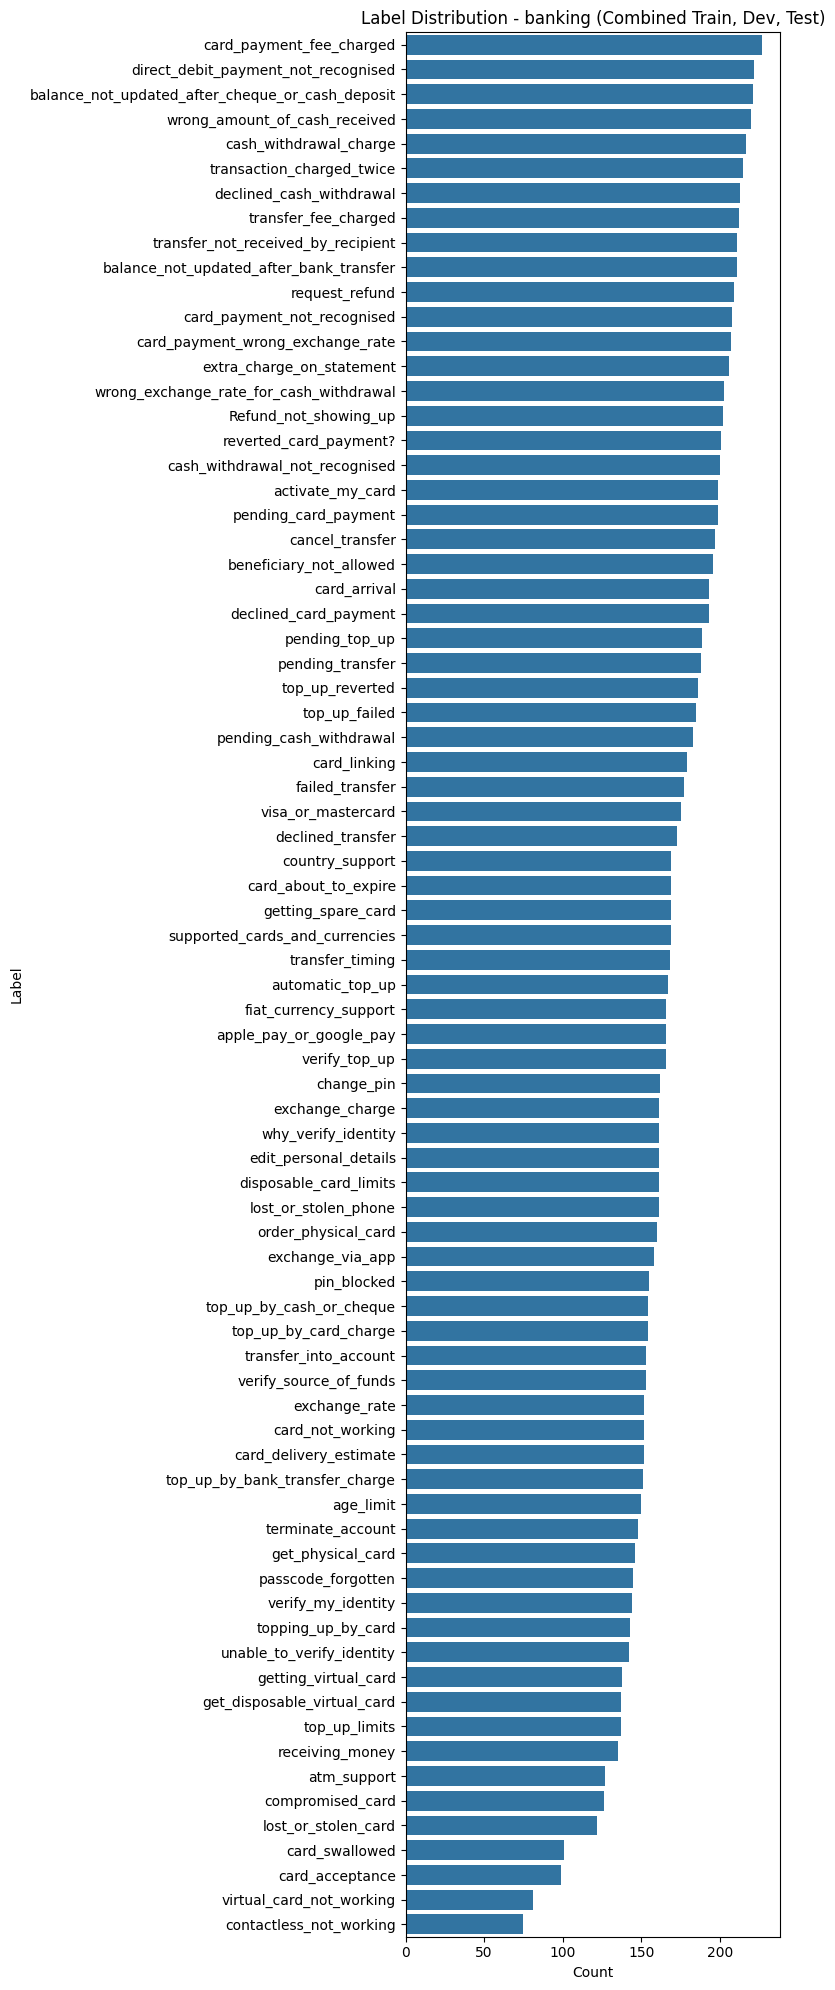

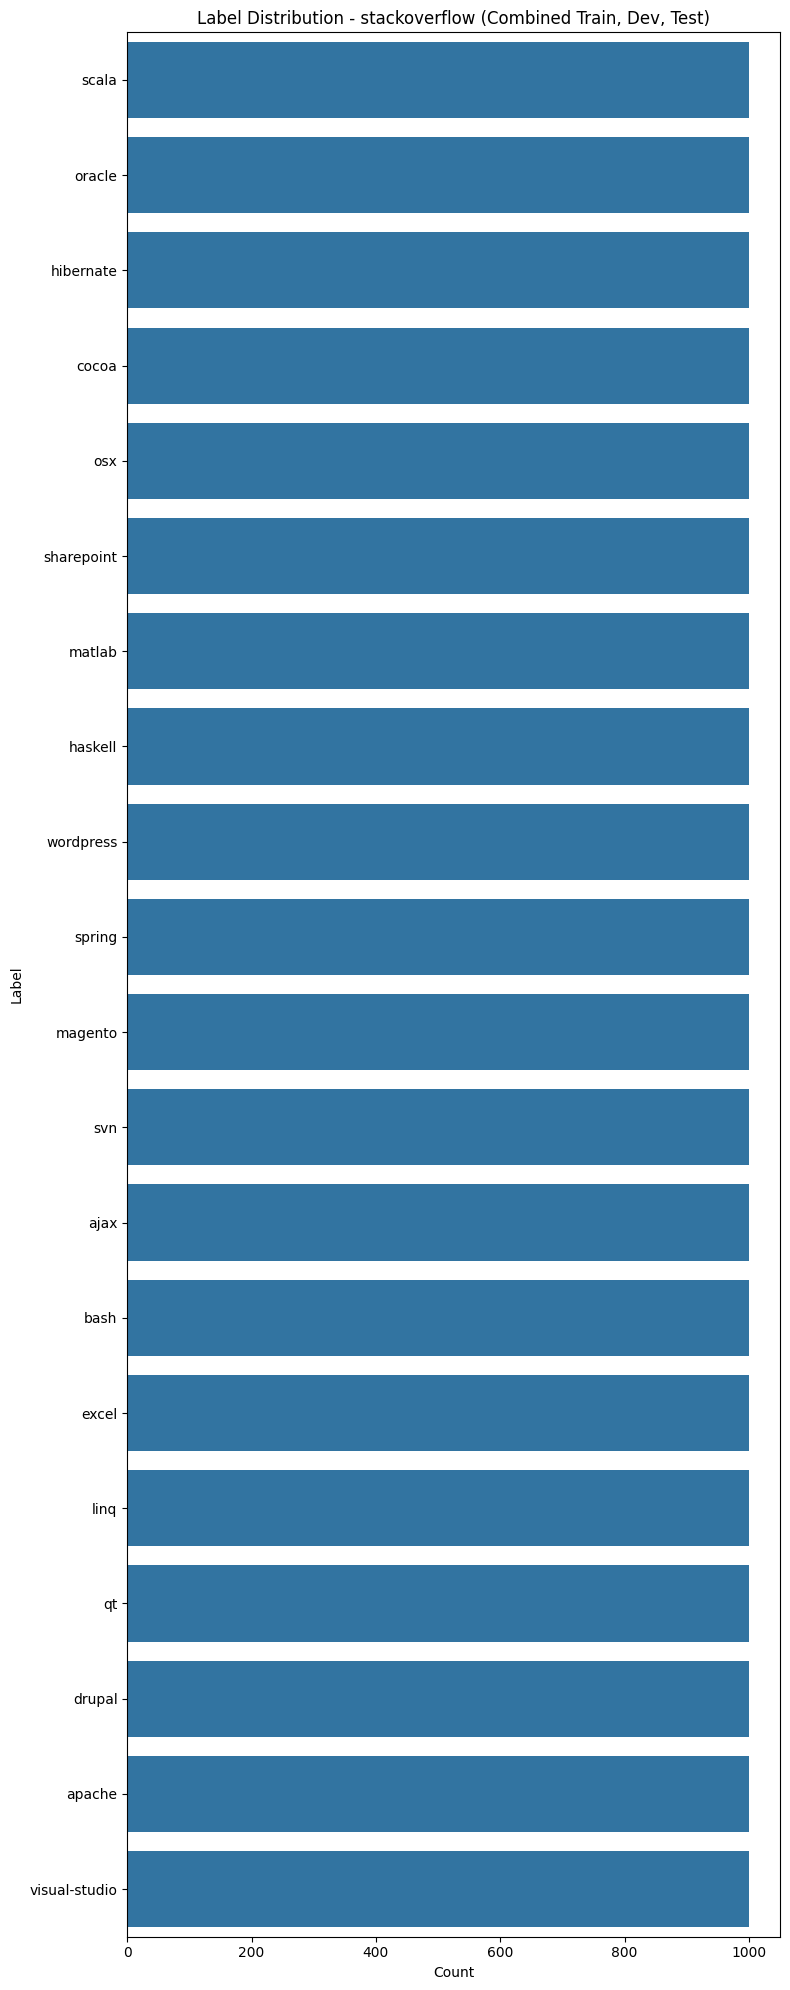

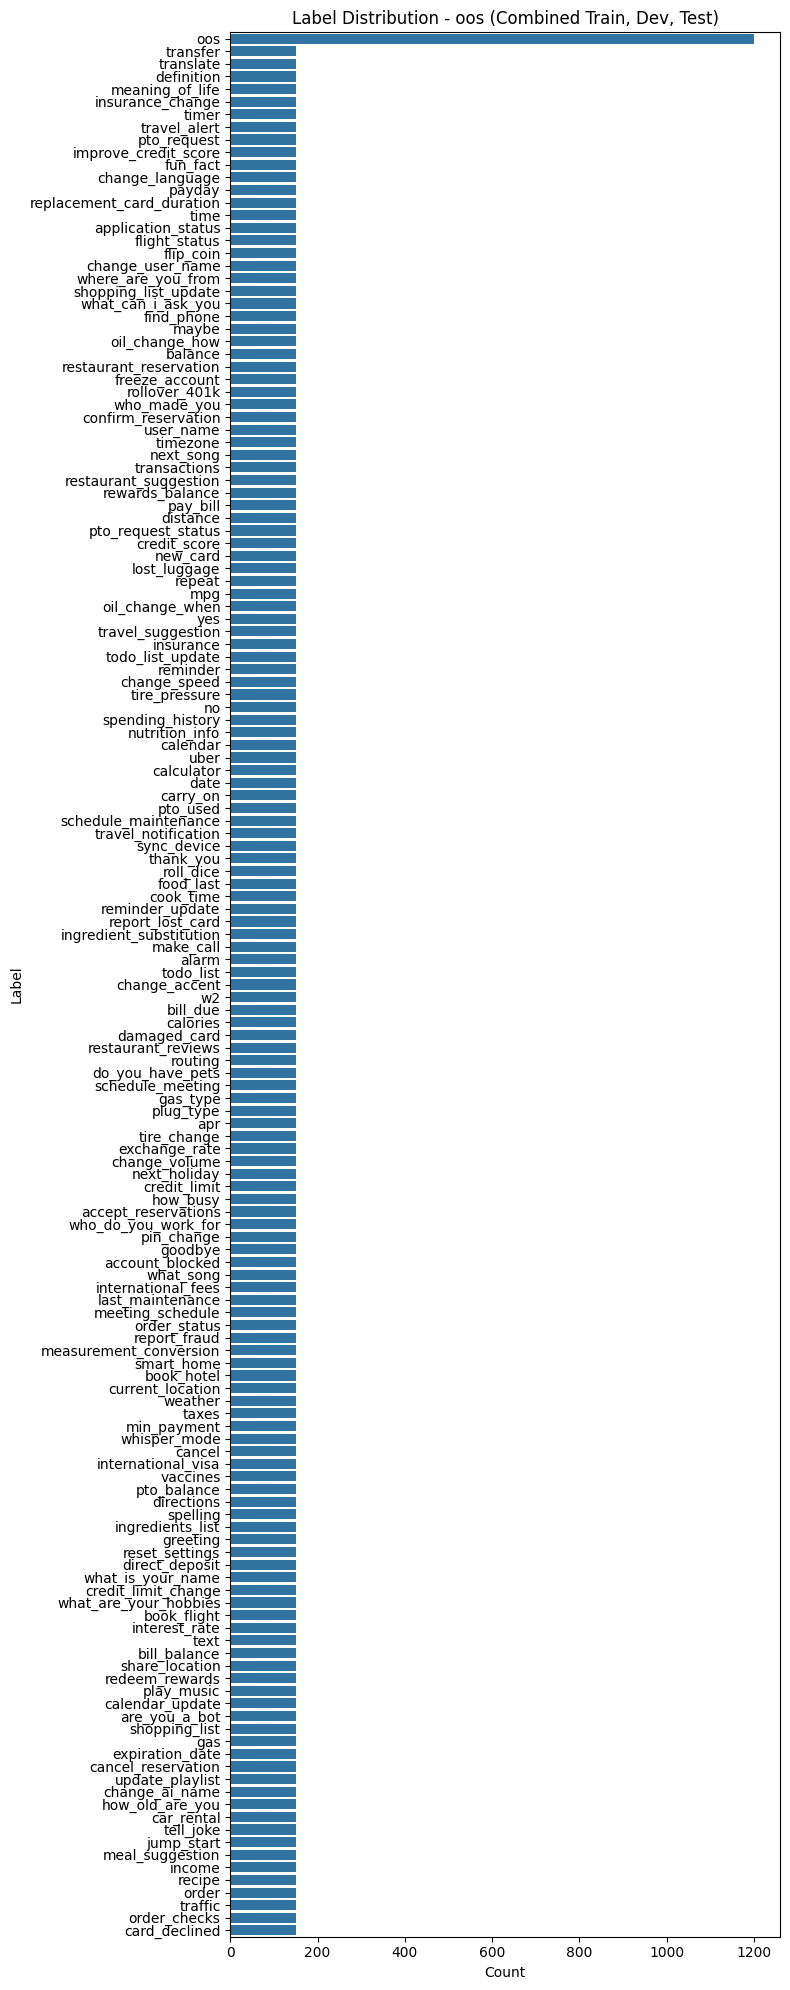

In [ ]:
# for each dataset (banking, stackoverflow, oos)
# plot the distribution of 'label' for the combined train, dev, and test data
# sort the bars by 'label' in ascending order

import matplotlib.pyplot as plt
import seaborn as sns

for dataset_name, df in dataset_dfs.items():
    if not df.empty:
        plt.figure(figsize=(8, 20))  # Adjust figure size for better label visibility
        # Calculate the order of labels based on count in descending order
        label_order = df['label'].value_counts().index
        sns.countplot(y='label', data=df, order=label_order)
        plt.title(f'Label Distribution - {dataset_name} (Combined Train, Dev, Test)')
        plt.xlabel('Count') # Add x-axis label
        plt.ylabel('Label') # Add y-axis label
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()
    else:
        print(f"No data found for {dataset_name}")

In [ ]:
# Value counts for each label in the combined banking77 dataframe
print("Value counts for each label in the combined banking77 dataset:")
display(dataset_dfs['banking']['label'].value_counts())

Value counts for each label in the combined banking77 dataset:


,count
label,
card_payment_fee_charged,227
direct_debit_payment_not_recognised,222
balance_not_updated_after_cheque_or_cash_deposit,221
wrong_amount_of_cash_received,220
cash_withdrawal_charge,217
...,...
lost_or_stolen_card,122
card_swallowed,101
card_acceptance,99


In [ ]:
# Value counts for each label in the combined oos dataframe
print("Value counts for each label in the combined OOS dataset:")
display(dataset_dfs['oos']['label'].value_counts())

Value counts for each label in the combined OOS dataset:


,count
label,
oos,1200
transfer,150
translate,150
definition,150
meaning_of_life,150
...,...
recipe,150
order,150
traffic,150


In [ ]:
# Value counts for each label within each split for the oos dataset
print("Value counts for each label by split in the OOS dataset:")
display(dataset_dfs['oos'].groupby('split')['label'].value_counts())

Value counts for each label by split in the OOS dataset:


split  label              
dev    accept_reservations     20
       account_blocked         20
       alarm                   20
       application_status      20
       apr                     20
                             ... 
train  where_are_you_from     100
       whisper_mode           100
       who_do_you_work_for    100
       who_made_you           100
       yes                    100
Name: count, Length: 451, dtype: int64

In [ ]:
# Value counts for each label within each split for the oos dataset
print("Value counts for each label by split in the OOS dataset:")
for split in ['train', 'dev', 'test']:
    print(f"\n--- {split} ---")
    display(dataset_dfs['oos'][dataset_dfs['oos']['split'] == split]['label'].value_counts())

Value counts for each label by split in the OOS dataset:

--- train ---


,count
label,
translate,100
transfer,100
timer,100
definition,100
meaning_of_life,100
...,...
income,100
order,100
traffic,100



--- dev ---


,count
label,
translate,20
transfer,20
timer,20
definition,20
meaning_of_life,20
...,...
income,20
order,20
traffic,20



--- test ---


,count
label,
oos,1200
transfer,30
translate,30
definition,30
meaning_of_life,30
...,...
recipe,30
order,30
traffic,30


In [ ]:
# banking77 grouping for the slides
12+28+9+10+6+12

77

In [ ]:
# stackoverflow
dataset_dfs['stackoverflow']['label'].value_counts()

,count
label,
scala,1000
oracle,1000
hibernate,1000
cocoa,1000
osx,1000
sharepoint,1000
matlab,1000
haskell,1000
wordpress,1000


# Sanity Check Labels

In [ ]:
# train, dev, test
# Sanity Check Labels between train, dev, test for banking
# then repeat for stackoverflow/oos

def sanity_check_labels(df):
    """Checks for label consistency across train, dev, and test splits."""
    train_labels = set(df[df['split'] == 'train']['label'].unique())
    dev_labels = set(df[df['split'] == 'dev']['label'].unique())
    test_labels = set(df[df['split'] == 'test']['label'].unique())

    print("Train labels:", train_labels)
    print("Dev labels:", dev_labels)
    print("Test labels:", test_labels)

    # Check for missing labels
    missing_in_dev = train_labels - dev_labels
    missing_in_test = train_labels - test_labels

    print("\nWith train labels as the base")
    print("Missing labels in dev:", missing_in_dev)
    print("Missing labels in test:", missing_in_test)

    # Check for extra labels
    extra_in_dev = dev_labels - train_labels
    extra_in_test = test_labels - train_labels

    print("\nExtra labels in dev:", extra_in_dev)
    print("Extra labels in test:", extra_in_test)


# Perform sanity check for each dataset
print("Banking:")
sanity_check_labels(df_banking)
print("\n---\n")  # Separator between datasets
print("Stackoverflow:")
sanity_check_labels(df_stackoverflow)
print("\n---\n")
print("OOS:")
sanity_check_labels(df_oos)


Banking:
Train labels: {'top_up_limits', 'order_physical_card', 'cash_withdrawal_charge', 'top_up_by_card_charge', 'balance_not_updated_after_bank_transfer', 'declined_cash_withdrawal', 'top_up_failed', 'card_linking', 'disposable_card_limits', 'get_disposable_virtual_card', 'card_payment_wrong_exchange_rate', 'transaction_charged_twice', 'card_not_working', 'card_about_to_expire', 'apple_pay_or_google_pay', 'unable_to_verify_identity', 'top_up_reverted', 'exchange_rate', 'pending_card_payment', 'transfer_fee_charged', 'cancel_transfer', 'verify_my_identity', 'transfer_into_account', 'request_refund', 'balance_not_updated_after_cheque_or_cash_deposit', 'top_up_by_cash_or_cheque', 'pin_blocked', 'contactless_not_working', 'wrong_amount_of_cash_received', 'get_physical_card', 'lost_or_stolen_phone', 'reverted_card_payment?', 'direct_debit_payment_not_recognised', 'exchange_charge', 'card_arrival', 'card_acceptance', 'pending_transfer', 'beneficiary_not_allowed', 'receiving_money', 'faile

In [ ]:
# Sanity Check Labels between banking (train/dev/test combined) vs oos, for intersection vs difference
# then repeat for stackoverflow vs oos

def label_sanity_check(df1, df2, df1name, df2name):
    """
    Compares labels between two dataframes.

    Args:
        df1: The first dataframe.
        df2: The second dataframe.
    """

    labels1 = set(df1['label'].unique())
    labels2 = set(df2['label'].unique())

    intersection = labels1.intersection(labels2)
    difference1 = labels1 - labels2
    difference2 = labels2 - labels1

    print("Intersection of labels:", intersection)
    print(f"Labels in {df1name} but not in {df2name}:", difference1)
    print(f"Labels in {df2name} but not in {df1name}:", difference2)


# banking (train/dev/test combined) vs oos
print("Banking vs OOS:")
label_sanity_check(df_banking, df_oos, "df_banking", "df_oos")
print("\n---\n")

# Stackoverflow vs OOS
print("Stackoverflow vs OOS:")
label_sanity_check(df_stackoverflow, df_oos, "df_stackoverflow", "df_oos")


Banking vs OOS:
Intersection of labels: {'exchange_rate'}
Labels in df_banking but not in df_oos: {'unable_to_verify_identity', 'top_up_reverted', 'top_up_limits', 'order_physical_card', 'cash_withdrawal_charge', 'age_limit', 'verify_source_of_funds', 'activate_my_card', 'virtual_card_not_working', 'balance_not_updated_after_bank_transfer', 'top_up_by_card_charge', 'edit_personal_details', 'pending_card_payment', 'card_delivery_estimate', 'pending_cash_withdrawal', 'passcode_forgotten', 'transfer_fee_charged', 'getting_virtual_card', 'cancel_transfer', 'top_up_by_bank_transfer_charge', 'cash_withdrawal_not_recognised', 'declined_cash_withdrawal', 'verify_my_identity', 'visa_or_mastercard', 'supported_cards_and_currencies', 'why_verify_identity', 'transfer_into_account', 'verify_top_up', 'wrong_exchange_rate_for_cash_withdrawal', 'top_up_failed', 'exchange_via_app', 'declined_transfer', 'request_refund', 'change_pin', 'transfer_timing', 'card_linking', 'disposable_card_limits', 'balance

# Explore some rows

In [ ]:
df_oos[df_oos['label'] == 'no']

,text,label,dataset,split
38383,"no, that's incorrect",no,oos,train
38384,that's not true,no,oos,train
38385,"that is not true, it's false",no,oos,train
38386,no way,no,oos,train
38387,not really,no,oos,train
...,...,...,...,...
52698,"no, you are wrong",no,oos,test
52699,"no, that is a falsehood",no,oos,test
52700,you got that wrong,no,oos,test
52701,that is the wrong answer,no,oos,test


In [ ]:
# 'no' seems to be looking at the words false/no/not/wrong/incorrect
sorted(df_oos[df_oos['label'] == 'no'].text.values)

['absolutely not',
 'are you sure i don’t think that’s correct',
 'certainly not',
 'definitely not',
 'false',
 'false for sure',
 'hell nah',
 'i am afraid that that is not the case',
 'i am saying no',
 'i believe that to be false',
 'i disagree that is false',
 'i do not believe that that is correct',
 'i do not think that is proper',
 'i do not think that is true, so i would say it is a false statement',
 "i don't believe that is possible, it is false",
 "i don't like that, no",
 "i don't think so",
 'i gotta say no',
 'i meant no',
 'i must say no',
 'i say negative',
 'i say no to that question',
 'i think it is false',
 'i think not',
 "i think that's false",
 'i would have to say the answer to that is no',
 'i would prefer not',
 'i would say that the statement is definitely false',
 "i'd say no",
 "i'll pass",
 'ill pass',
 'incorrect, it is certainly a false statement',
 'invalid',
 'it is false',
 'it is no',
 'it is very much false',
 'it seems not',
 "it's a no",
 'nada',

In [ ]:
df_oos[df_oos['label'] == 'oos']

,text,label,dataset,split
55583,how much is an overdraft fee for bank,oos,oos,test
55584,why are exponents preformed before multiplicat...,oos,oos,test
55585,what size wipers does this car take,oos,oos,test
55586,where is the dipstick,oos,oos,test
55587,how much is 1 share of aapl,oos,oos,test
...,...,...,...,...
56778,find my wallet,oos,oos,test
56779,can you give me the gps location of harvey,oos,oos,test
56780,where's my buddy steve right this second,oos,oos,test
56781,locate jenny at her present position,oos,oos,test


In [ ]:
len_oosdataset_ooslabel = len(df_oos[df_oos['label'] == 'oos'])
len_oos_oos_half = len_oosdataset_ooslabel//2
len_oos_oos_half

600

In [ ]:
# 'oos'
sorted(df_oos[df_oos['label'] == 'oos'].text.values)[:len_oos_oos_half]

['a show on broadway',
 'accept incoming phone call',
 'according to my fitness tracker, how many push ups have i done today',
 'add color to the black and white photos',
 'add mary to my phone plan, please',
 'add my wife as an authorized user to checking account 20905432',
 'adjust the contrast of the black and white photos',
 'am i connected to wifi',
 'am i currently connected to wifi',
 'am i too old to be a sugar babyo',
 'am kind of busy now',
 'answer the phone',
 'any headlines from my area',
 'aquire the soundtracks from the movie if i stay and add them to my ipod',
 'are all televisions high definition',
 'are all the street lamps working on my street',
 'are androids expensive',
 'are any earning reports due',
 'are any justice league movies coming out',
 'are bad habits closely related with addictions',
 'are indians nowadays reminiscent of a decade ago',
 'are over the ear headphones better than in ear headphones',
 'are people with a mental illness eligible for disabilit

In [ ]:
# 'oos'
sorted(df_oos[df_oos['label'] == 'oos'].text.values)[len_oos_oos_half:]

['make a list of stocks that would be good to invest in to start making money',
 'make a list of the top 100 famous quotes',
 'make a list of what materials have been used for spacesuits',
 'make an ad to sell my real estate',
 'make me a list of the top ten reviewed hiking boots on jetcom',
 'make me a map of all earthquake hotspots in the continental us',
 'may i finish washing then i give you please',
 'mickey mouse is a huge part of disney',
 'name the leader from tibet that stands firm for world peace',
 'open cnn websiteo',
 'open up internet browser',
 'order me a blue pin stripe suit from saville row',
 'order me a book of stamps and envelopes',
 'order the new book titled "ghost work"',
 'organize my photos by date please',
 'organize photos by year they were taken',
 'park the car',
 'pick out an excerise outfit for me',
 'plant all your flowers just after easter in early april',
 'play the current tennis match on the tv in the living room',
 'please activate a wireless hotsp

In [ ]:
df_banking[df_banking.duplicated()]

,text,label,dataset,split
12439,Which ATMs accept this card?,atm_support,banking,test


In [ ]:
df_banking[df_banking.text == 'Which ATMs accept this card?']

,text,label,dataset,split
10139,Which ATMs accept this card?,atm_support,banking,test
12439,Which ATMs accept this card?,atm_support,banking,test


In [ ]:
df_stackoverflow[df_stackoverflow.duplicated()]

,text,label,dataset,split
14634,Wordpress SEO Features,wordpress,stackoverflow,train
18884,File Watcher in Cocoa,cocoa,stackoverflow,train
19243,Primitive recursion,haskell,stackoverflow,train
22665,LINQ to SQL,linq,stackoverflow,train
26966,Spring Web Flow,spring,stackoverflow,dev
32679,basic matlab help,matlab,stackoverflow,test
32719,Excel formula - auto sum for the same types,excel,stackoverflow,test


In [ ]:
def plot_label_split_heatmap():
    for dataset_name, df in all_data.groupby('dataset'):
        pivot = df.pivot_table(index='label', columns='split', aggfunc='size', fill_value=0)
        plt.figure(figsize=(10, min(0.5 * len(pivot), 20)))
        sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Label Distribution by Split in {dataset_name}')
        plt.xlabel('Split')
        plt.ylabel('Label')
        plt.tight_layout()
        plt.show()

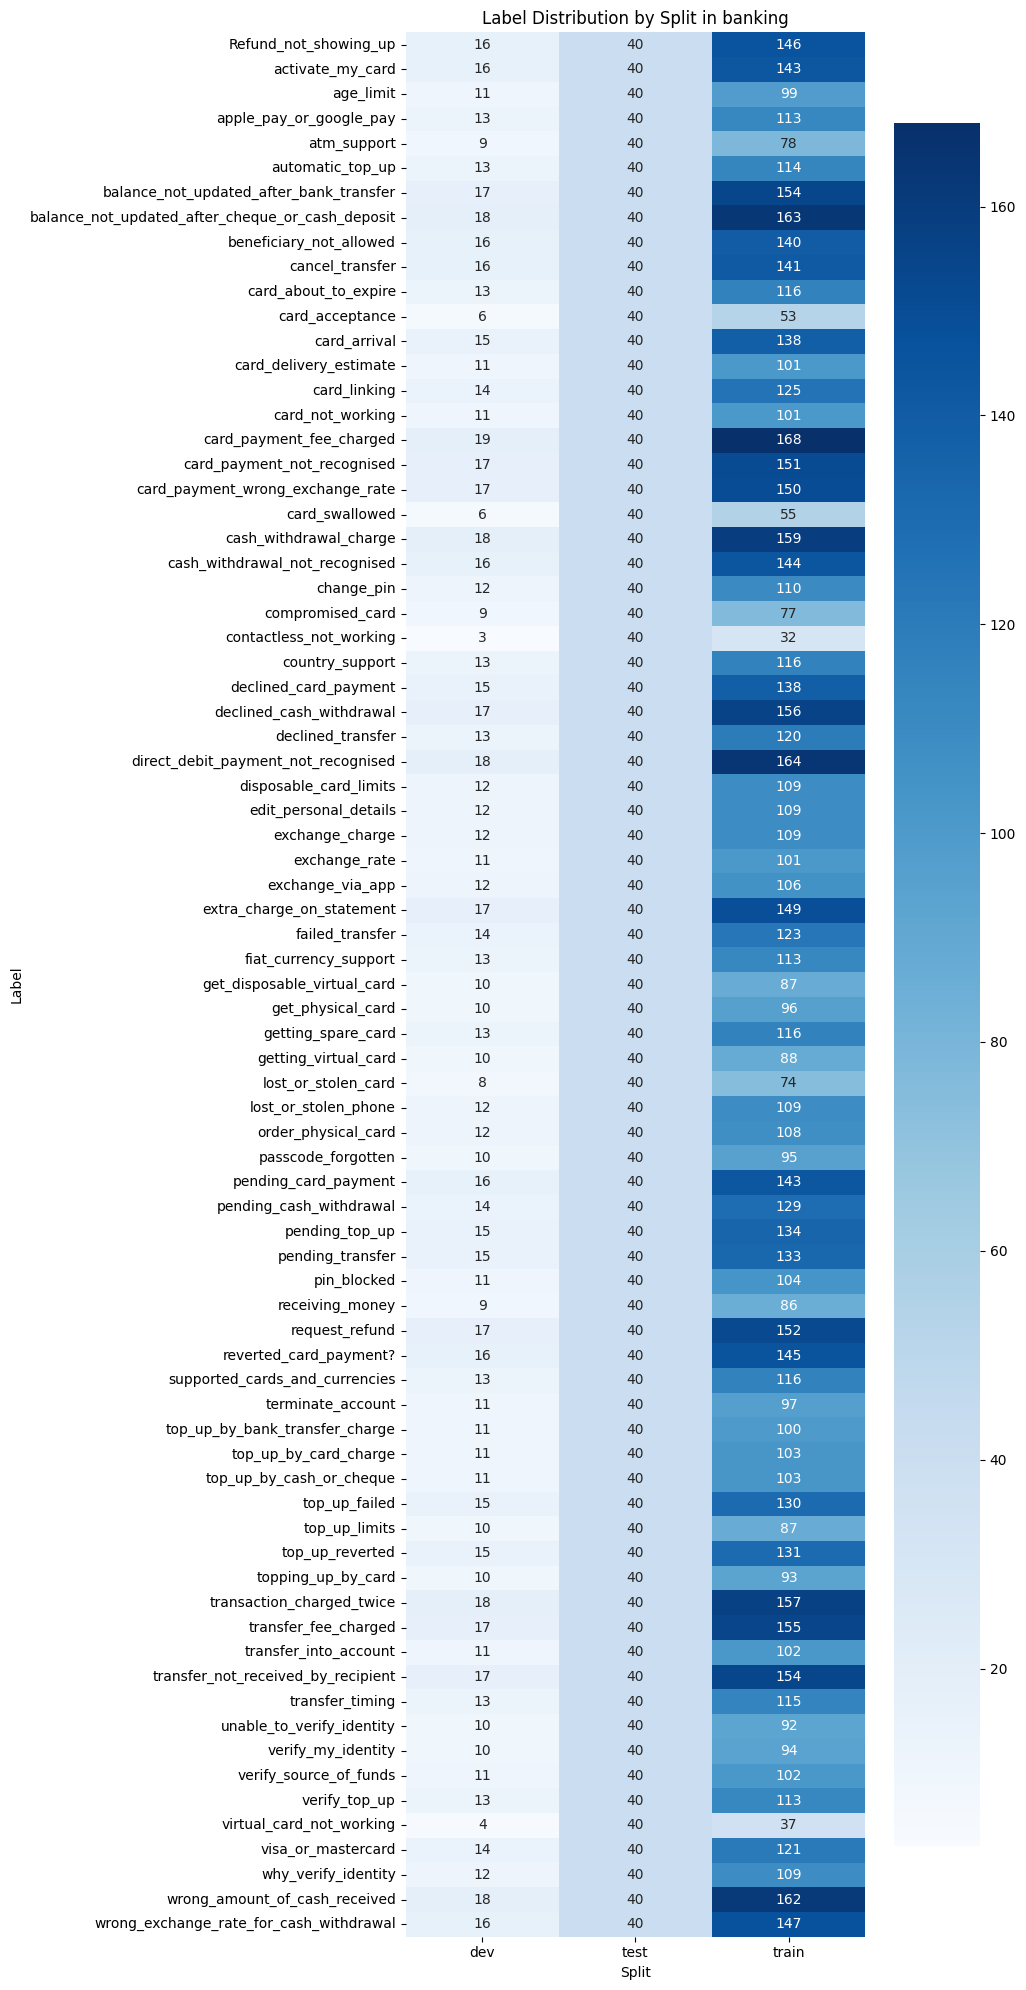

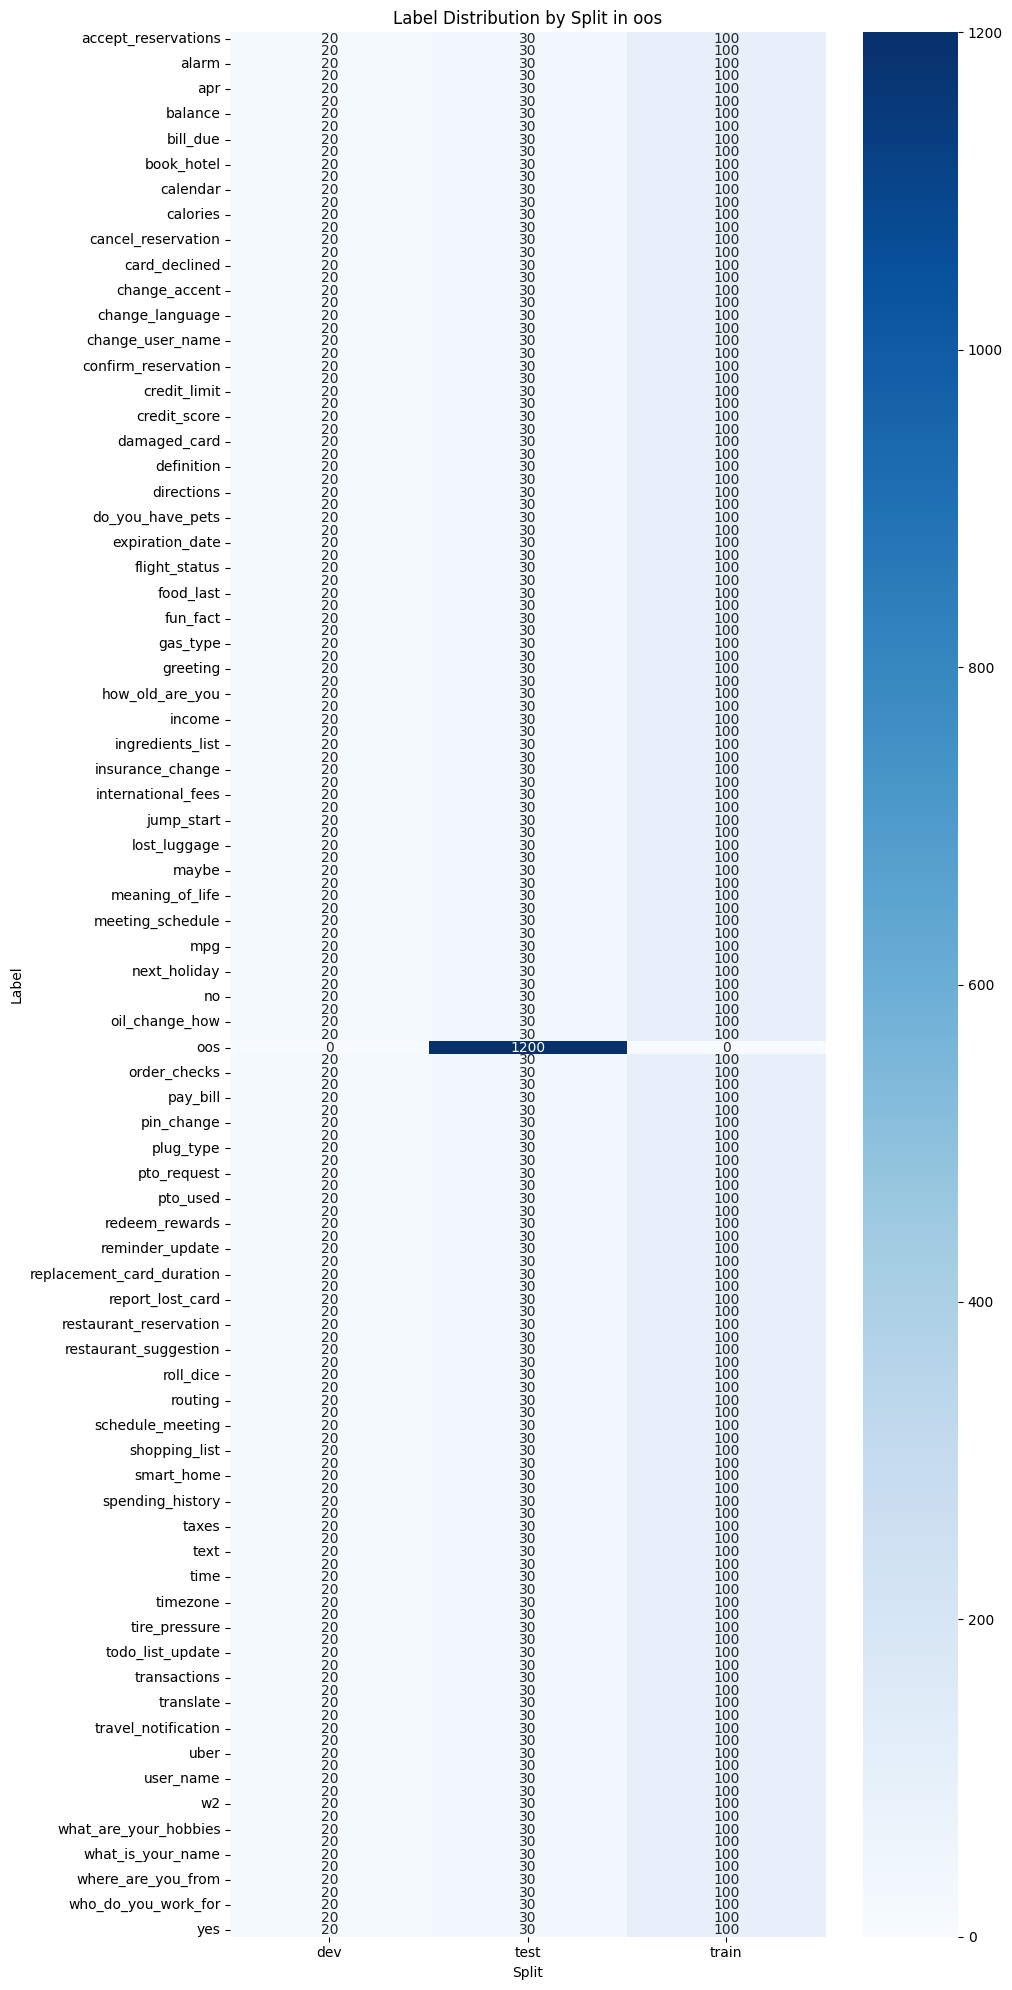

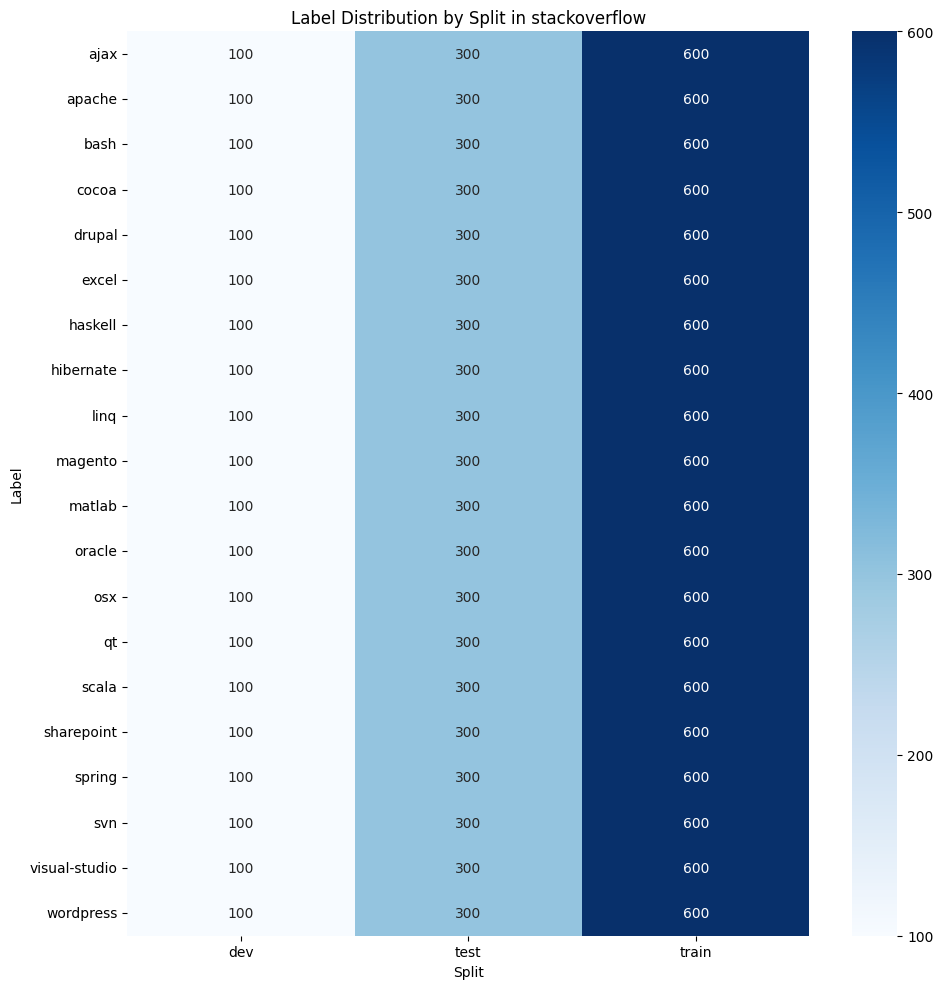

In [ ]:
plot_label_split_heatmap()